# Using Euler's Method to Integrate a Simple Harmonic Oscillator #

We can describe a simple harmonic oscillator (with a spring constant, $k$, mass, $m$, displacement, $x$, and velocity, $v$) using the following two coupled first-order differential equations:
$$ \frac{dv}{dt} = -\frac{kx}{m} $$
$$ \frac{dx}{dt} = v $$

We will use Euler's Method to integrate these equations. This is an iterative method in which we will:

1) calculate $v(t+dt) = v(t) + \left( \frac{dv}{dt} \right)dt$, assuming $\frac{dv}{dt}$ is constant over the interval ($t$, $t+dt$).
2) calculate $x(t+dt) = x(t) + dt \cdot v(t)$, assuming $v(t)$ is constant over the interval ($t$, $t+dt$).
3) let $t = t+dt$, and repeat. 

Also, note that to obtain the energy of the Harmonic Oscillator, 

$$V = \frac{1}{2} k x^2$$
and 
$$K = \frac{1}{2} mv^2 $$

and to obtain the period, T, 

$$ T = 2\pi \sqrt{\frac{m}{k}} $$

which we can can use to find points where the error in velocity, $v(t)-v(0)$, and the error in position, $x(t)-v(0)$, can be calculated.

In [2]:
import numpy as np

def euler_harmonic_oscillator(k, m, x0, t0, tf, v0, dt):
    '''
    Integrate the harmonic oscillator using Euler's Method.

    Parameters
    ----------
    k : float
        Spring Constant
    m : float
        Mass in kg
    x0 : float
        Initial position
    t0 : float
        Initial time
    tf : float
        Final time
    v0 : float
        Initial velocity
    dt : float
        Time interval

    Returns
    -------
    t_values : numpy.ndarray(dtype=float)
        The time values
    v_values : numpy.ndarray(dtype=float)
        The velocity values
    x_values : numpy.ndarray(dtype=float)
        The position values
    t_error : numpy.ndarray(dtype=float)
        The time values where error was calculated
    v_error : numpy.ndarray(dtype=float)
        The error in velocity
    x_error : numpy.ndarray(dtype=float)
        The error in position
    kinetic : numpy.ndarray(dtype=float)
        The kinetic energy 
    potential : numpy.ndarray(dtype=float)
        The potential energy
    '''
    t_values = np.arange(t0, tf+dt, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    x_error = []
    v_error = []
    t_error = []
    period = 2*np.pi*np.sqrt(m/k)

    x_values[0] = x0 
    v_values[0] = v0 

    for i, t in enumerate(t_values[:-1]):
        v_values[i+1] = v_values[i] + dt*(-k/m)*x_values[i]
        x_values[i+1] = x_values[i] + dt*v_values[i]
        if ((t+dt) % period <= dt/2) or (-(((t+dt) % period) - period) <= dt/2):
            x_error.append(x_values[i+1]-x_values[0])
            v_error.append(v_values[i+1]-v_values[0])
            t_error.append(t+dt)

    potential = (k*x_values**2)/2
    kinetic = (m*v_values**2)/2
    return t_values, v_values, x_values, np.array(t_error), np.array(v_error), np.array(x_error), kinetic, potential

t_values, v_values, x_values, t_error, v_error, x_error, kinetic, potential = euler_harmonic_oscillator(k=1.0, m=1.0, x0=1.0, t0=0.0, tf=50.0, v0=0.0, dt=0.001)

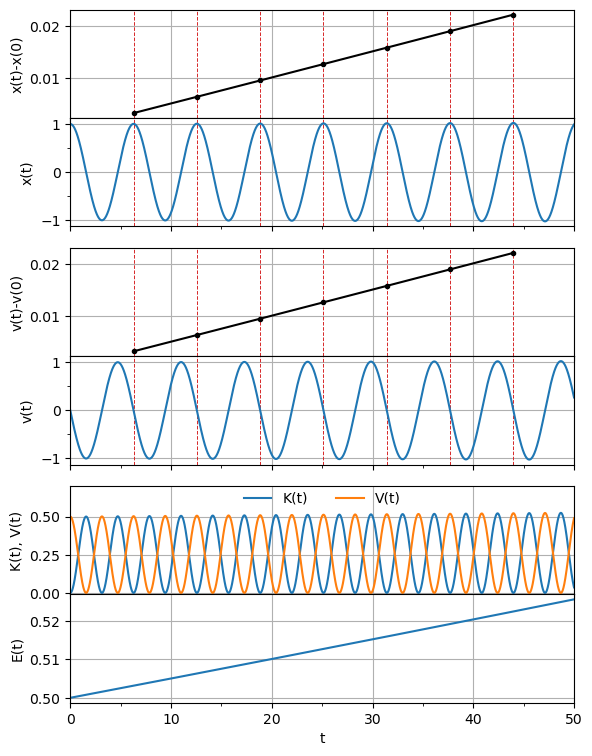

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6.5, 9))
gs = plt.GridSpec(ncols=1, nrows=8, height_ratios=[5, 5, 1, 5, 5, 1, 5, 5], hspace=0)
ax = [fig.add_subplot(gs[0])]
ax = ax + [
    fig.add_subplot(gs[1], sharex=ax[0]),
    fig.add_subplot(gs[3], sharex=ax[0]),
    fig.add_subplot(gs[4], sharex=ax[0]),
    fig.add_subplot(gs[6], sharex=ax[0]),
    fig.add_subplot(gs[7], sharex=ax[0]),
]

# Plot of error in position
for t in t_error:
    ax[0].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
ax[0].plot(t_error, x_error, marker=".", color="k")
ax[0].set_ylabel("x(t)-x(0)")

# Plot of position vs time
for t in t_error:
    ax[1].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
ax[1].plot(t_values, x_values)
ax[1].set_ylabel("x(t)")

# Plot of error in velocity
for t in t_error:
    ax[2].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
ax[2].plot(t_error, x_error, marker=".", color="k")
ax[2].set_ylabel("v(t)-v(0)")

# Plot of velocity vs time
for t in t_error:
    ax[3].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
ax[3].plot(t_values, v_values)
ax[3].set_ylabel("v(t)")

# Plot of kinetic and potential energy
ax[4].plot(t_values, kinetic, label="K(t)")
ax[4].plot(t_values, potential, label="V(t)")
ax[4].set_ylabel("K(t), V(t)")
ax[4].legend(ncols=2, loc="upper center", frameon=False, borderaxespad=0)
ax[4].set_ylim(-0.01, 0.7)

# Plot of total energy
ax[5].plot(t_values, kinetic+potential)
ax[5].set_ylabel("E(t)")

# Set xlim, xlabel, and xtick positions on plots (only need to do once because sharex=True in plt.subplots())
ax[5].set_xlim(0, 50)
ax[5].set_xlabel("t")
ax[0].xaxis.set_major_locator(plt.MultipleLocator(10))
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(5))

# Set yticks on each plot
ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[2].yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax[3].yaxis.set_major_locator(plt.MultipleLocator(1))
ax[3].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[4].yaxis.set_major_locator(plt.MultipleLocator(0.25))
ax[5].yaxis.set_major_locator(plt.MultipleLocator(0.01))

# Turn on grid for each plot
for axis in ax:
    axis.grid()

# Turn off xaxis tick labels on all but bottom plot
for axis in ax[:-1]:
    axis.tick_params(labelbottom=False)

plt.show()